<a href="https://colab.research.google.com/github/khil4uk/HW_Stat2/blob/master/HW_stat_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('googleplaystore.csv')  
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
# Удалим строку с явным выбросом рейтинга (=19)
df = df[df.Rating != 19].reset_index(drop=True)

In [7]:
from pylab import rcParams # увеличение размера графиков
rcParams['figure.figsize'] = 13,6

Text(0.5, 1.0, 'Categories')

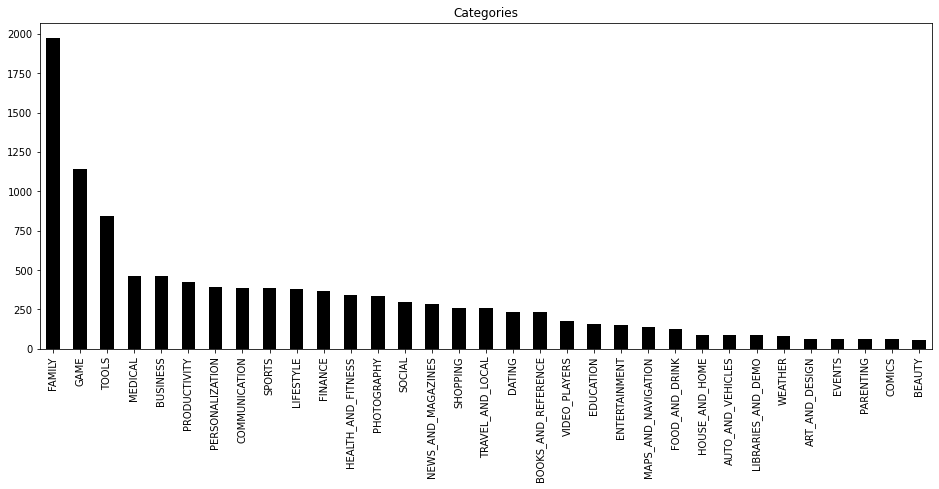

In [8]:
df.Category.value_counts().plot.bar(figsize=(16, 6), color = 'black')
plt.title('Categories')

**Вывод:** со значительным отрывом самыми популярными являются категории приложений "Family", "Game", "Tools"

Text(0.5, 1.0, 'Rating')

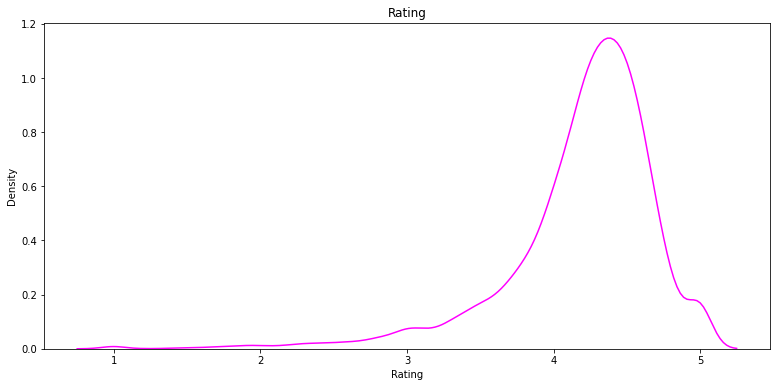

In [9]:
sns.kdeplot(data=df, x='Rating', color = 'magenta')
plt.title('Rating')

**Вывод:** наибольшее количество приложений с рейтингом около 4,3.


Text(0.5, 1.0, 'Rating boxplot')

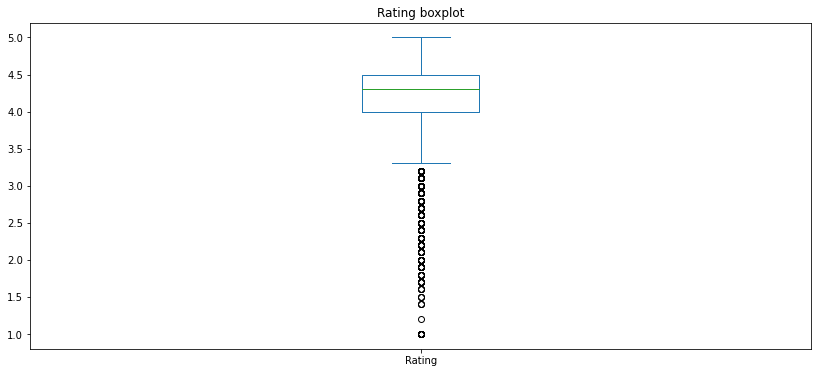

In [10]:
df.Rating.plot.box(figsize=(14, 6))
plt.title('Rating boxplot')

**Вывод:** наибольшее количество приложений находится в интервале оценок 4,0 - 4,5.

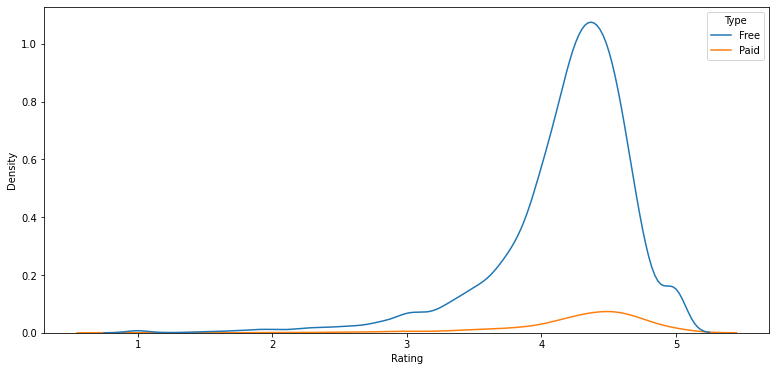

In [11]:
sns.kdeplot(data=df, x='Rating', hue='Type')

**Вывод:** платные приложение в среднем оценивают чуть лучше (rating около 4,5), чем бесплатные (rating около 4,3).

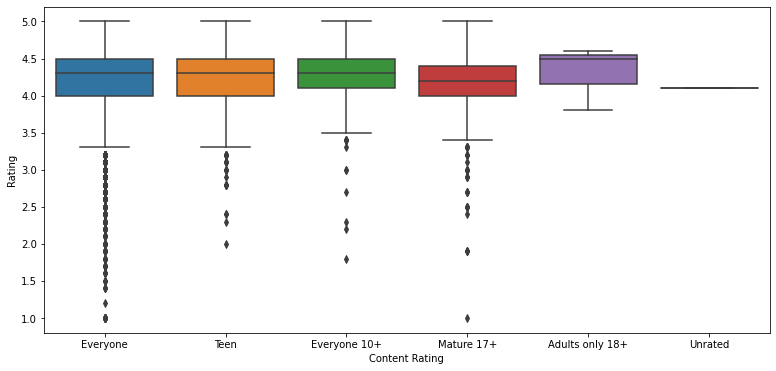

In [13]:
sns.boxplot(data=df, y='Rating', x='Content Rating')

**Вывод:** категория пользователей "Mature 17+" наиболее сдержанна в выставлении высоких оценок. Лучшие оценки выставляют пользователи из категории "Adults only 18+"

In [33]:
top = df[df.Category.isin(['FAMILY', 'TOOLS', 'GAME'])] # выделим самые популярные категории в датафрейм
top

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10826,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10833,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


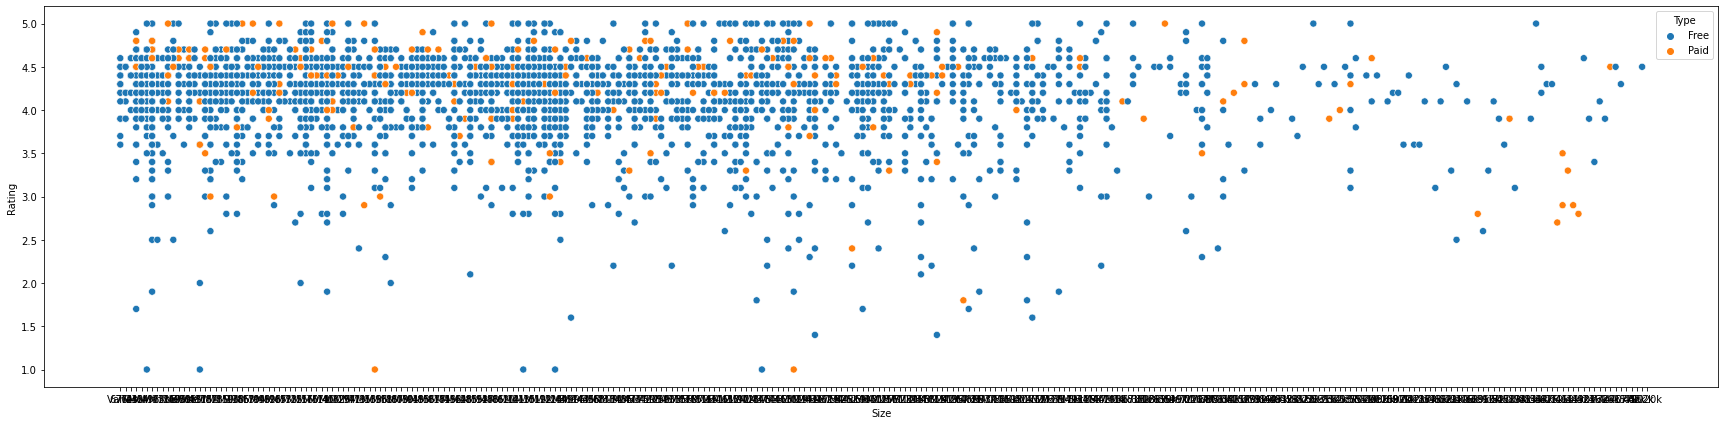

In [44]:
plt.figure(figsize=(30, 7))

sns.scatterplot(top['Size'], top['Rating'], hue=top['Type'], s=50)

**Вывод:** большинство бесплатных приложений имеют небольшой размер и высокий рейтинг. В то время как для платных приложений отмечается более равномерное распределение.